In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [4]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [6]:
sum_squares_error(np.array(y), np.array(t))

0.5975

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [16]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [20]:
np.random.choice(60000, 10)

array([57034, 25851, 36290,  8027,  2227,  2911,  5119, 59758, 17830,
       29236])

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)

    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size 

In [ ]:
# 미분 구현(잘못된 예시)
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x)) / h

In [ ]:
np.float32(1e-50)

# 미분은 곧 특정 순간에 변화량을 의미
# 작은 변화의 변하는 값을 알기 위해 h는 lim을 이용하여 0에 가깝게 계산
# 여기서 h를 매우 작은 값으로 1e-50을 사용했는데
# 반올림오차로 인한 h가 0이 되어버림
# 보통 h를 10e-4 정도로 입력함

0.0

In [10]:
np.float32(1e-4)

1e-04

In [4]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [5]:
# 4.3.2 수치 미분의 예

def function_1(x):
    return 0.01*x**2 + 0.1*x

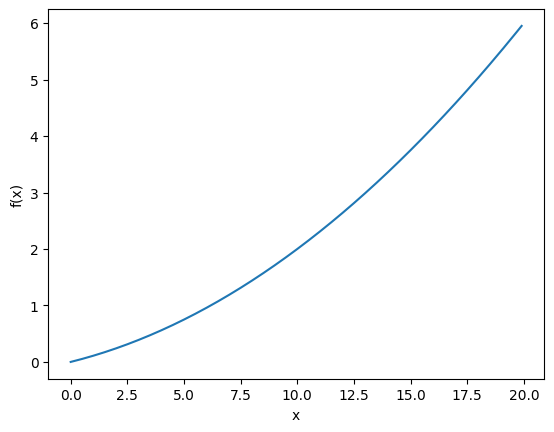

In [6]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 20 미포함
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [7]:
numerical_diff(function_1, 5)

0.1999999999990898

In [8]:
numerical_diff(function_1, 10)

0.2999999999986347

In [ ]:
# 접선 함수

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


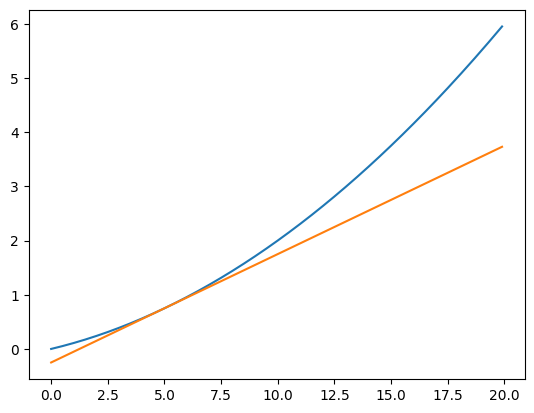

In [ ]:
# 5일 때의 접선

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


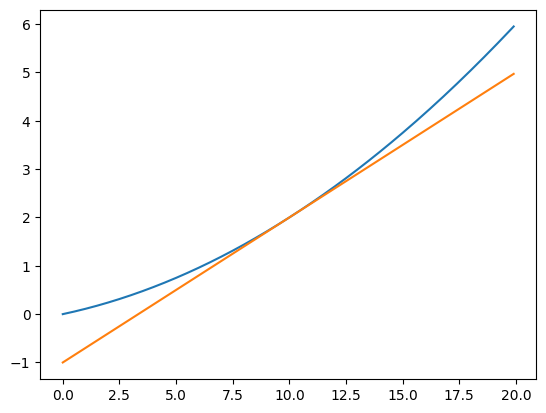

In [13]:
# 10일 때의 접선

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [14]:
# 4.3.3 편미분

def function_2(x):
    return x[0]**2 + x[1]**2

In [15]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [16]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [17]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [18]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [19]:
# 4.4 기울기

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [21]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [22]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [23]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [24]:
# 4.4.1 경사하강법

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [25]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [26]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [27]:
# 학습률이 10

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [28]:
# 학습률이 1e-10

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])